In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold


In [2]:
data = pd.read_csv('train_mix.csv')
data2 = pd.read_csv('train_em.csv')
print(data)

     Unnamed: 0   ID  N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  \
0             0    1     400       1   1.0  21464    0      1.0           1.0   
1             1    2    4500       0   1.0  20617    0      0.0           1.0   
2             2    3    1012       1   1.0  25594    1      0.0           0.0   
3             3    4    1925       1   1.0  19994    0      0.0           1.0   
4             4    5    1504       0   0.0  13918    0      0.0           1.0   
..          ...  ...     ...     ...   ...    ...  ...      ...           ...   
413         413  414     681       1   1.0  24472    0      0.0           1.0   
414         414  415    1103       0   1.0  14245    0      0.0           0.0   
415         415  416    1055       0   1.0  20819    0      0.0           1.0   
416         416  417     691       0   0.0  21185    0      0.0           0.0   
417         417  418     976       0   0.0  19358    0      0.0           1.0   

     Spiders  ...  Tryglice

In [3]:
X = data.drop(['Status', 'ID', 'Unnamed: 0'], axis=1)
y = data['Status']
X_M = data2.drop(['Status', 'ID', 'Unnamed: 0'], axis=1)
y_M = data2['Status']
nan_status_count = y.isna().sum()
print(nan_status_count)


0


# 1. Random Forest - All Features

<Axes: >

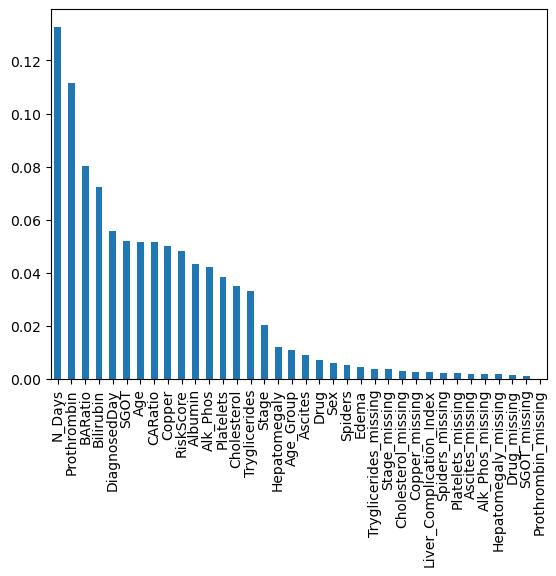

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
feature_names = X.columns[:]
rf = RandomForestClassifier(n_estimators=40, random_state=27)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar')

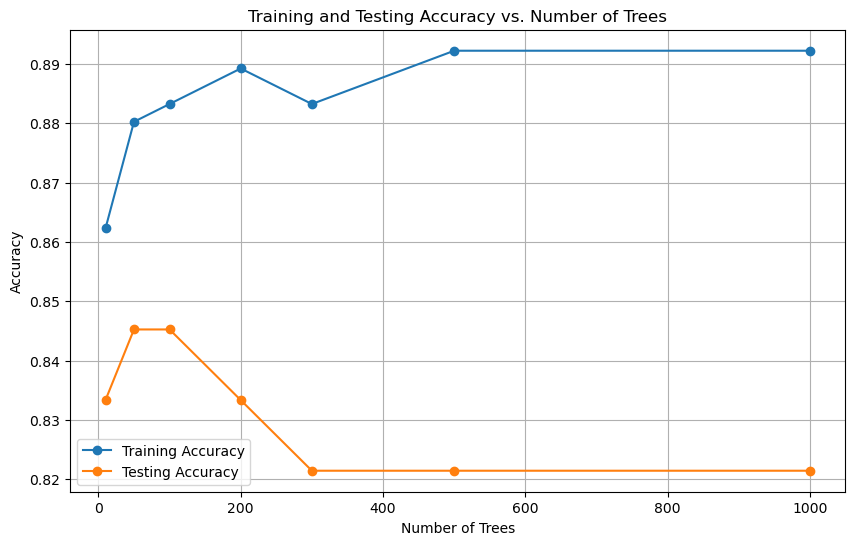

In [8]:

tree_count = [10, 50, 100, 200, 300, 500, 1000]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_M, y_M, test_size=0.2, random_state = 42)

train_accuracies = []
test_accuracies = []

train_accuracies2 = []
test_accuracies2 = []

for n_trees in tree_count:
    rf = RandomForestClassifier(n_estimators=n_trees, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 27)
    rf2 = RandomForestClassifier(n_estimators=n_trees, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 27)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train_accuracies.append(metrics.accuracy_score(y_train, train_pred))
    test_accuracies.append(metrics.accuracy_score(y_val, test_pred))

    rf2.fit(X_train2, y_train2)
    train_pred2 = rf2.predict(X_train2)
    test_pred2 = rf2.predict(X_val2)

    train_accuracies2.append(metrics.accuracy_score(y_train2, train_pred2))
    test_accuracies2.append(metrics.accuracy_score(y_val2, test_pred2))
    

    

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(tree_count, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_count, test_accuracies, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Best test accuracy0.8690476190476191 21 -1
0.8772455089820359


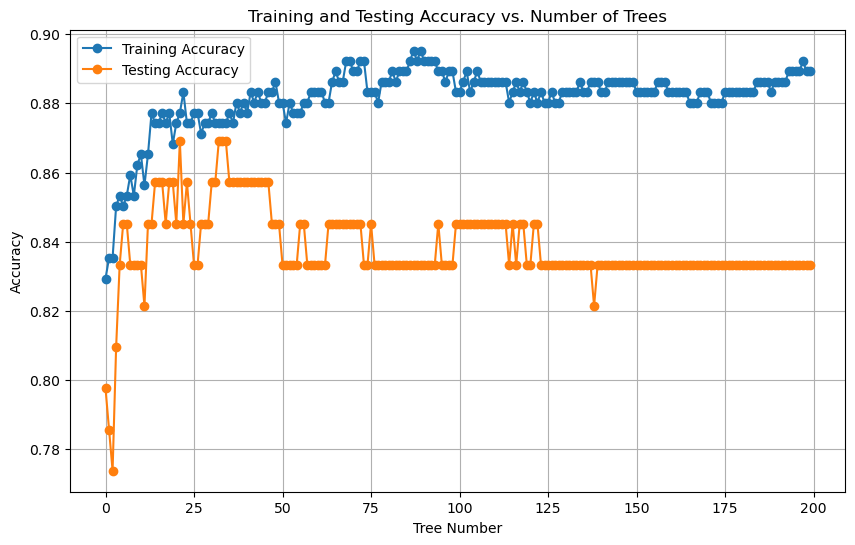

In [18]:

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
best = -1
best_idx_i = -1
best_idx_j = -1
train_best = -1
test_acc = []
train_acc = []
random = []
for i in range (200):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
    rf = RandomForestClassifier(n_estimators=i+1, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 27)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train = metrics.accuracy_score(y_train, train_pred)
    test = metrics.accuracy_score(y_val, test_pred)
    train_acc.append(train)
    test_acc.append(test)
    random.append(i)

    if test > best:
        best = test
        best_idx_i = i
        train_best = train 
    # print('train accuracy' + str(train))
    # print('test accuracy' + str(test))
print('Best test accuracy' + str(best) + " " + str(best_idx_i) + " " + str(best_idx_j))
print(train_best)
# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(random, train_acc, label='Training Accuracy', marker='o')
plt.plot(random, test_acc, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Tree Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



# Random Forest - Selected Features

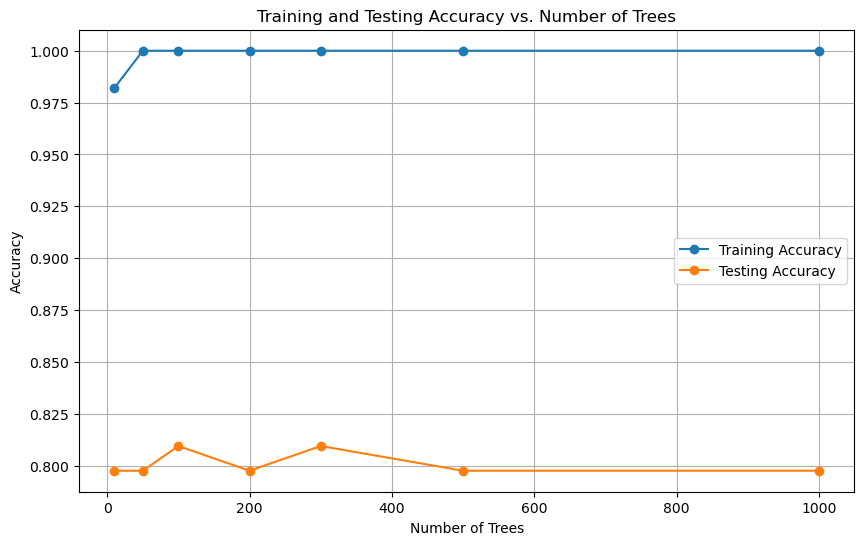

In [26]:

tree_count = [10, 50, 100, 200, 300, 500, 1000]
important_features = ['BARatio', 'N_Days', 'Bilirubin', 'Prothrombin', 'DiagnosedDay']

X_filtered = X[important_features]
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)
train_accuracies = []
test_accuracies = []

for n_trees in tree_count:
    rf = RandomForestClassifier(n_estimators=n_trees)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train_accuracies.append(metrics.accuracy_score(y_train, train_pred))
    test_accuracies.append(metrics.accuracy_score(y_val, test_pred))

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(tree_count, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_count, test_accuracies, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Best test accuracy0.8214285714285714 4 -1
0.8233532934131736


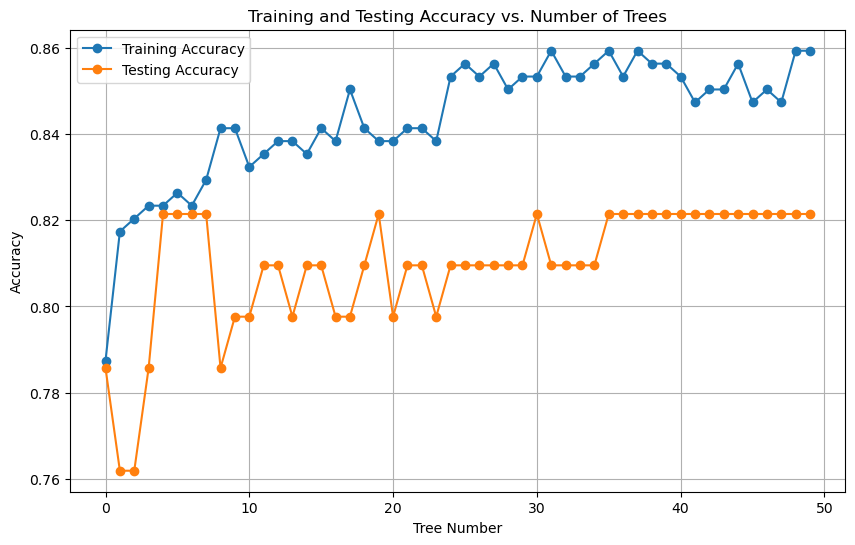

In [27]:
important_features = ['BARatio', 'Age', 'Bilirubin', 'Prothrombin', 'DiagnosedDay']

X_filtered = X[important_features]
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)
best = -1
best_idx_i = -1
best_idx_j = -1
train_best = -1
test_acc = []
train_acc = []
random = []
for i in range (50):
    X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)
    rf = RandomForestClassifier(n_estimators=i+1, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 27)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train = metrics.accuracy_score(y_train, train_pred)
    test = metrics.accuracy_score(y_val, test_pred)
    train_acc.append(train)
    test_acc.append(test)
    random.append(i)

    if test > best:
        best = test
        best_idx_i = i
        train_best = train 
    # print('train accuracy' + str(train))
    # print('test accuracy' + str(test))
print('Best test accuracy' + str(best) + " " + str(best_idx_i) + " " + str(best_idx_j))
print(train_best)
# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(random, train_acc, label='Training Accuracy', marker='o')
plt.plot(random, test_acc, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Tree Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Random Forest -- BA Ratio Only

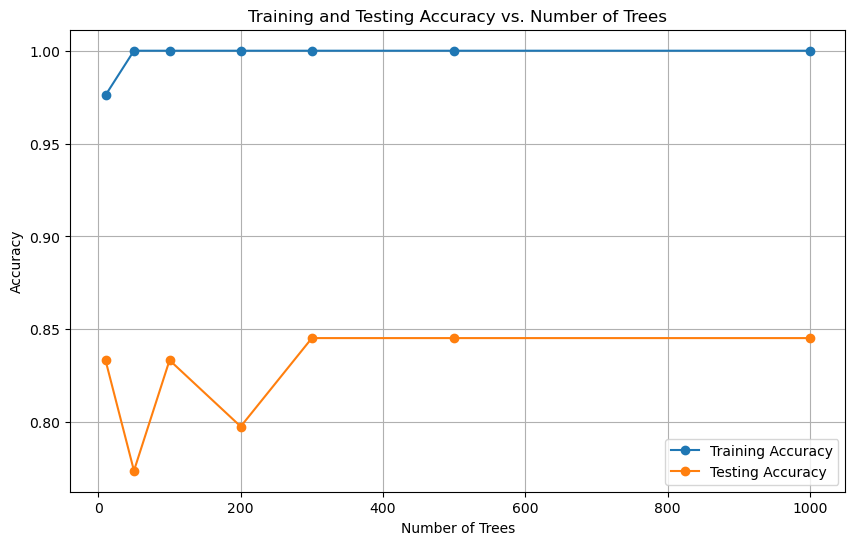

In [28]:
tree_count = [10, 50, 100, 200, 300, 500, 1000]
important_features = ['BARatio', 'Age']

X_filtered = X[important_features]
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)
train_accuracies = []
test_accuracies = []

for n_trees in tree_count:
    rf = RandomForestClassifier(n_estimators=n_trees)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train_accuracies.append(metrics.accuracy_score(y_train, train_pred))
    test_accuracies.append(metrics.accuracy_score(y_val, test_pred))

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(tree_count, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(tree_count, test_accuracies, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Best test accuracy0.7738095238095238 12 -1
0.8263473053892215


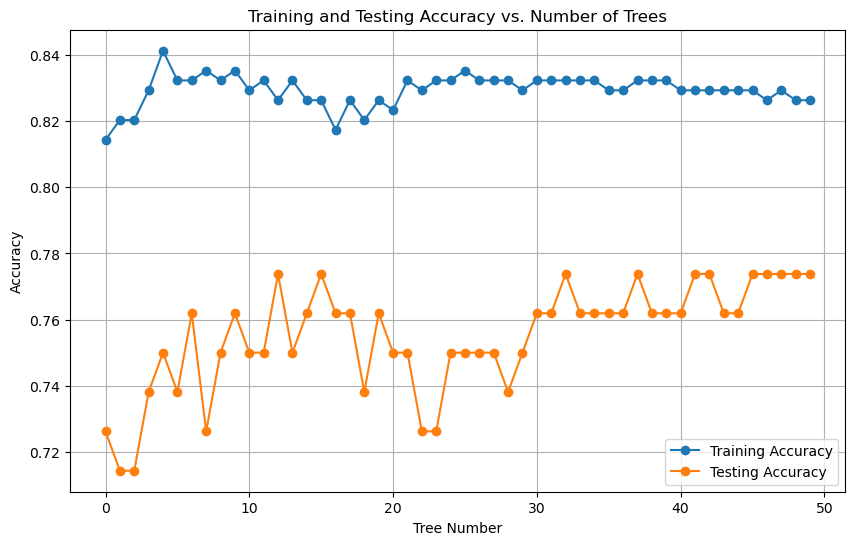

In [29]:
important_features = ['BARatio', 'Age']

X_filtered = X[important_features]
X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 42)
best = -1
best_idx_i = -1
best_idx_j = -1
train_best = -1
test_acc = []
train_acc = []
random = []
for i in range (50):
    X_train, X_val, y_train, y_val = train_test_split(X_filtered, y, test_size=0.2, random_state = 20)
    rf = RandomForestClassifier(n_estimators=i+1, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 27)
    rf.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_val)

    train = metrics.accuracy_score(y_train, train_pred)
    test = metrics.accuracy_score(y_val, test_pred)
    train_acc.append(train)
    test_acc.append(test)
    random.append(i)

    if test > best:
        best = test
        best_idx_i = i
        train_best = train 
    # print('train accuracy' + str(train))
    # print('test accuracy' + str(test))
print('Best test accuracy' + str(best) + " " + str(best_idx_i) + " " + str(best_idx_j))
print(train_best)
# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(random, train_acc, label='Training Accuracy', marker='o')
plt.plot(random, test_acc, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.xlabel('Tree Number')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# SVM 

In [15]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type        
}

svm = SVC(random_state=88)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)



0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    0
416    0
417    0
Name: Status, Length: 418, dtype: int64


0.7976190476190477
5


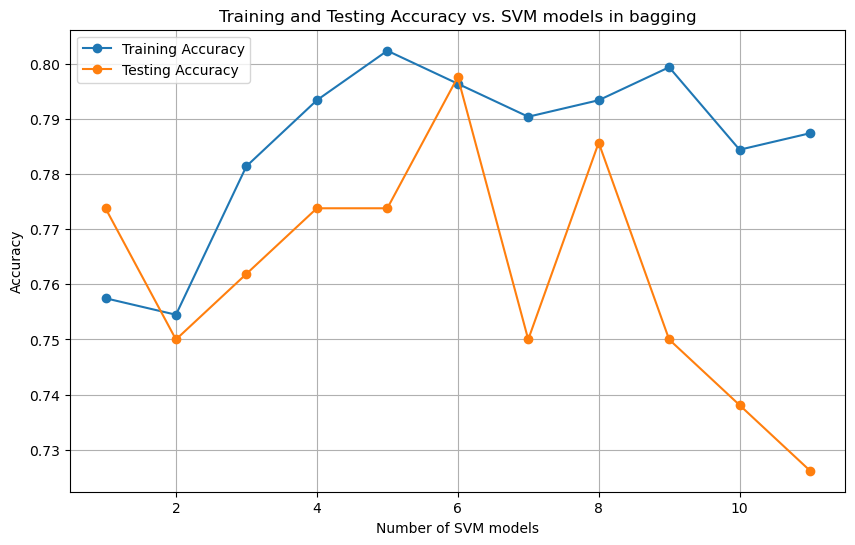

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 20)

best = -1
best_Ind = -1
train_result = []
test_result = []
random = []
# Convert PCA output to DataFrame
# x_pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_val)
for i in range (11):
    random.append(i+1)
    svm = SVC(C=1, gamma = 0.1, kernel = 'linear')
    bagging_svm = BaggingClassifier(
        estimator=svm,      # SVM is the base learner
        n_estimators=i+1,         # Number of SVM models to train
        max_samples=0.8,         # Each model gets 80% of the training data
        max_features=1.0,        # Use all features for each model
        bootstrap=True,          # Sample data with replacement
        bootstrap_features=False,  # Do not sample features
        n_jobs=-1,               # Use all available processors
        random_state=42
    )

    bagging_svm.fit(X_train, y_train)
    train_pred = bagging_svm.predict(X_train)
    test_pred = bagging_svm.predict(X_val)

    train = metrics.accuracy_score(y_train, train_pred)
    test = metrics.accuracy_score(y_val, test_pred)
    if (test > best):
        best = test
        best_Ind = i

    train_result.append(train)
    test_result.append(test)

print(best)
print(best_Ind)
plt.figure(figsize=(10, 6))
plt.plot(random, train_result, label='Training Accuracy', marker='o')
plt.plot(random, test_result, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. SVM models in bagging')
plt.xlabel('Number of SVM models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# print('train accuracy' + str(train))
# print('test accuracy' + str(test))

0.6190476190476191
0


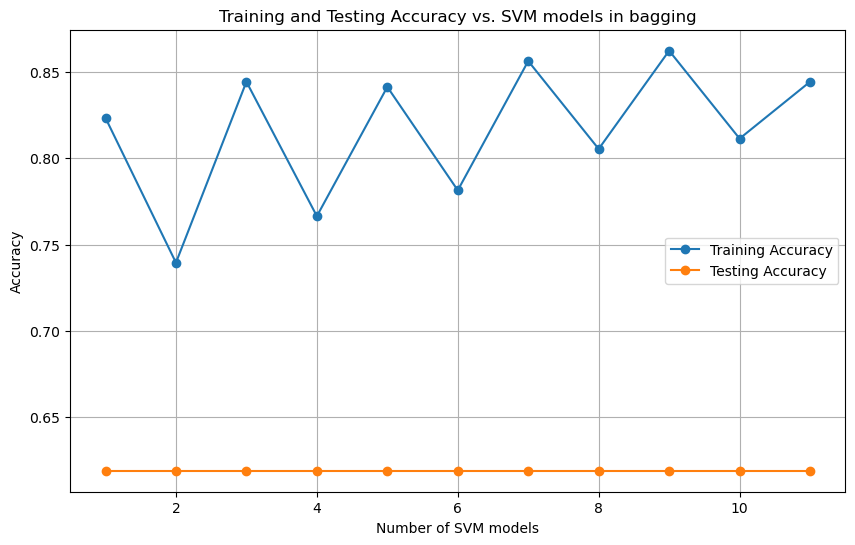

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 20)

best = -1
best_Ind = -1
train_result = []
test_result = []
random = []
# Convert PCA output to DataFrame
# x_pca_df = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_val)
for i in range (11):
    random.append(i+1)
    svm = SVC(C=1, gamma = 0.1, kernel = 'rbf')
    bagging_svm = BaggingClassifier(
        estimator=svm,      
        n_estimators=i+1,         
        max_samples=0.8,         
        max_features=1.0,        
        bootstrap=True,          
        bootstrap_features=False,  
        n_jobs=-1,               
        random_state=42
    )

    bagging_svm.fit(X_train, y_train)
    train_pred = bagging_svm.predict(X_train)
    test_pred = bagging_svm.predict(X_val)

    train = metrics.accuracy_score(y_train, train_pred)
    test = metrics.accuracy_score(y_val, test_pred)
    if (test > best):
        best = test
        best_Ind = i

    train_result.append(train)
    test_result.append(test)

print(best)
print(best_Ind)
plt.figure(figsize=(10, 6))
plt.plot(random, train_result, label='Training Accuracy', marker='o')
plt.plot(random, test_result, label='Testing Accuracy', marker='o')

# Graph aesthetics
plt.title('Training and Testing Accuracy vs. SVM models in bagging')
plt.xlabel('Number of SVM models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# KNN - All Features

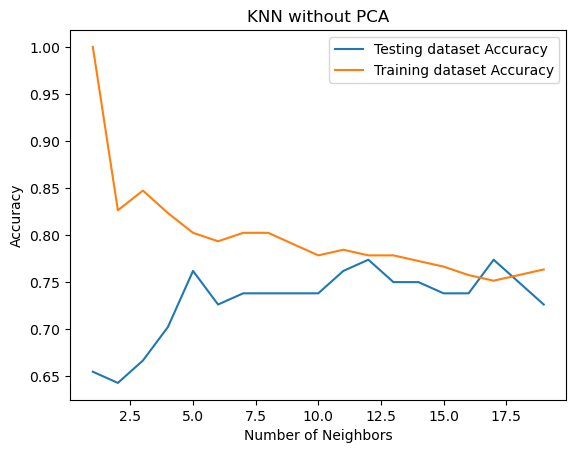

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 27)

neighbors = np.arange(1, 20) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy_no = np.empty(len(neighbors))

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy_no[i] = knn.score(X_val, y_val) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy_no, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('Number of Neighbors') 
plt.ylabel('Accuracy') 
plt.title('KNN without PCA')
plt.show() 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

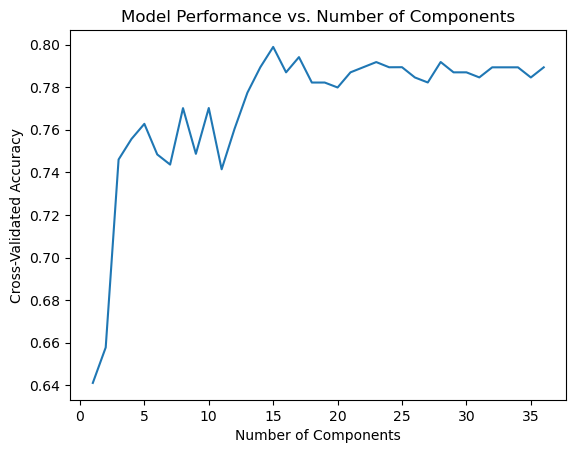

In [33]:
scores = []
for n in range(1, X.shape[1] + 1):  # Loop through component numbers
    pipeline = Pipeline([
        ('pca', PCA(n_components=n)),
        ('model', LogisticRegression(max_iter=1000))
    ])
    cv_scores = cross_val_score(pipeline, X, y, cv=5)
    scores.append(cv_scores.mean())

plt.plot(range(1, X.shape[1] + 1), scores)
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Model Performance vs. Number of Components')
plt.show()

0.9285714285714286
11


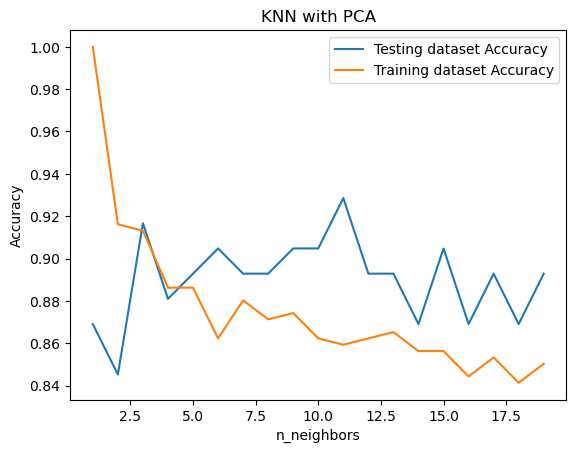

In [35]:
X_PCA = data.copy()
scalar = StandardScaler()
X_PCA = scalar.fit_transform(X_PCA)
pca = PCA(n_components=5)  # Retain 50% explained variance
x_pca = pca.fit_transform(X_PCA)

X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state = 27, stratify=y)

neighbors = np.arange(1, 20) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy_pca = np.empty(len(neighbors))
best = -1
bestInd = -1
curr = 0

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy_pca[i] = knn.score(X_val, y_val) 

    curr = test_accuracy_pca[i]
    if (curr > best):
        bestInd = k
        best = curr

print (best)
print(bestInd)
# Generate plot 
plt.plot(neighbors, test_accuracy_pca, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title('KNN with PCA')
plt.show() 

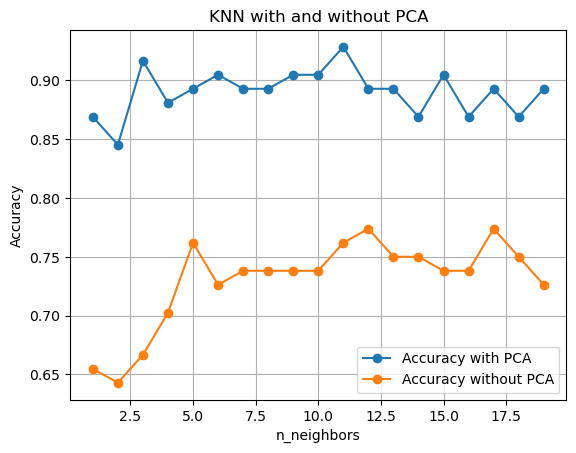

In [36]:
plt.plot(neighbors, test_accuracy_pca, label = 'Accuracy with PCA', marker='o') 
plt.plot(neighbors, test_accuracy_no, label = 'Accuracy without PCA', marker='o') 

plt.legend() 
plt.grid(True)
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title('KNN with and without PCA')
plt.show() 

0.9285714285714286
7


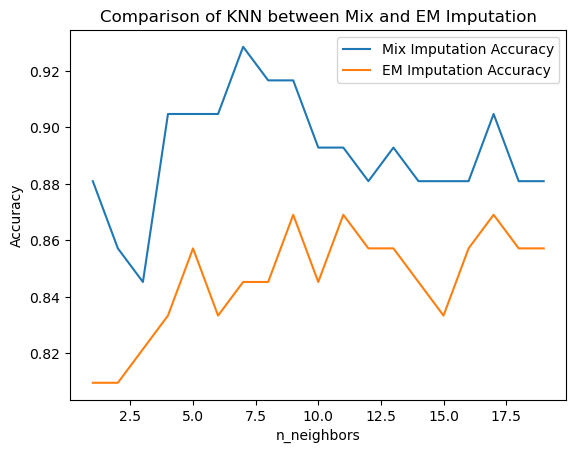

In [48]:
X_PCA1 = data.copy()
scalar = StandardScaler()
X_PCA1 = scalar.fit_transform(X_PCA1)
pca = PCA(n_components=5)  # Retain 50% explained variance
x_pca1 = pca.fit_transform(X_PCA1)

X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state = 27, stratify=y)

X_PCA2 = data2.copy()
scalar = StandardScaler()
X_PCA2 = scalar.fit_transform(X_PCA2)
pca2 = PCA(n_components=5)  # Retain 50% explained variance
x_pca2 = pca2.fit_transform(X_PCA2)

X_train, X_val, y_train, y_val = train_test_split(x_pca, y, test_size=0.2, random_state = 35, stratify=y)
X_train2, X_val2, y_train2, y_val2 = train_test_split(x_pca2, y, test_size=0.2, random_state = 35, stratify=y)

neighbors = np.arange(1, 20) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy_pca = np.empty(len(neighbors))
train_accuracy2 = np.empty(len(neighbors)) 
test_accuracy_pca2 = np.empty(len(neighbors))
best = -1
bestInd = -1
curr = 0

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 

    knn2 = KNeighborsClassifier(n_neighbors=k) 
    knn2.fit(X_train2, y_train2) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy_pca[i] = knn.score(X_val, y_val) 
    train_accuracy2[i] = knn2.score(X_train2, y_train2) 
    test_accuracy_pca2[i] = knn2.score(X_val2, y_val2) 

    curr = test_accuracy_pca[i]
    if (curr > best):
        bestInd = k
        best = curr

print (best)
print(bestInd)
# Generate plot 
plt.plot(neighbors, test_accuracy_pca, label = 'Mix Imputation Accuracy') 
plt.plot(neighbors, test_accuracy_pca2, label = 'EM Imputation Accuracy') 

plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title('Comparison of KNN between Mix and EM Imputation')
plt.show() 

# KNN - Selected Features

In [38]:
# important_features = ['BARatio', 'Age', 'Bilirubin', 'Prothrombin', 'DiagnosedDay']
important_features_Only = ['BARatio']
important_features_two = ['Prothrombin']
important_features_third = ['Bilirubin', 'Albumin']
important_features_four = ['Albumin']
important_features_five = ['Bilirubin']


X_filtered1 = X[important_features_Only]
X_filtered2 = X[important_features_two]
X_filtered3 = X[important_features_third]
X_filtered4 = X[important_features_four]
X_filtered5 = X[important_features_five]

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_filtered1, y, test_size=0.2, random_state = 42)
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_filtered2, y, test_size=0.2, random_state = 42)
X_train3, X_val3, y_train3, y_val3 = train_test_split(X_filtered3, y, test_size=0.2, random_state = 42)
X_train4, X_val4, y_train4, y_val4 = train_test_split(X_filtered4, y, test_size=0.2, random_state = 42)
X_train5, X_val5, y_train5, y_val5 = train_test_split(X_filtered5, y, test_size=0.2, random_state = 42)

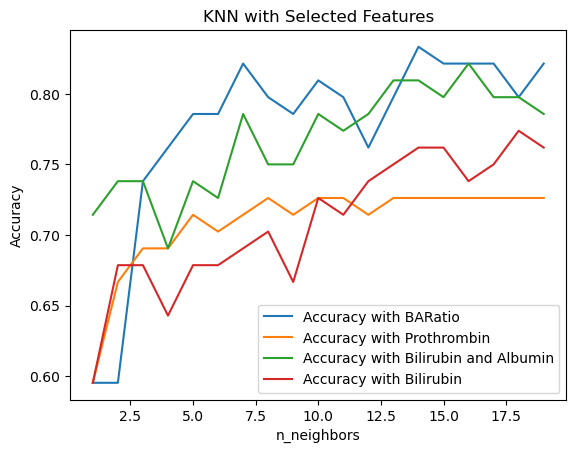

In [39]:
neighbors = np.arange(1, 20) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors))
train_accuracy2 = np.empty(len(neighbors)) 
test_accuracy2 = np.empty(len(neighbors))
train_accuracy3 = np.empty(len(neighbors)) 
test_accuracy3 = np.empty(len(neighbors))
train_accuracy4 = np.empty(len(neighbors)) 
test_accuracy4 = np.empty(len(neighbors))
train_accuracy5 = np.empty(len(neighbors)) 
test_accuracy5 = np.empty(len(neighbors))

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train1, y_train1) 
    knn2 = KNeighborsClassifier(n_neighbors=k) 
    knn2.fit(X_train2, y_train2) 
    knn3 = KNeighborsClassifier(n_neighbors=k) 
    knn3.fit(X_train3, y_train3) 
    knn4 = KNeighborsClassifier(n_neighbors=k) 
    knn4.fit(X_train4, y_train4) 
    knn5 = KNeighborsClassifier(n_neighbors=k) 
    knn5.fit(X_train5, y_train5) 
      
    # Compute training and test data accuracy 
    train_accuracy[i] = knn.score(X_train1, y_train1) 
    test_accuracy[i] = knn.score(X_val1, y_val1) 
    train_accuracy2[i] = knn2.score(X_train2, y_train2) 
    test_accuracy2[i] = knn2.score(X_val2, y_val2)
    train_accuracy3[i] = knn3.score(X_train3, y_train3) 
    test_accuracy3[i] = knn3.score(X_val3, y_val3)  
    train_accuracy4[i] = knn4.score(X_train4, y_train4) 
    test_accuracy4[i] = knn4.score(X_val4, y_val4)  
    train_accuracy5[i] = knn5.score(X_train5, y_train5) 
    test_accuracy5[i] = knn5.score(X_val5, y_val5)  
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Accuracy with BARatio') 
plt.plot(neighbors, test_accuracy2, label = 'Accuracy with Prothrombin') 
plt.plot(neighbors, test_accuracy3, label = 'Accuracy with Bilirubin and Albumin') 
# plt.plot(neighbors, test_accuracy4, label = 'Accuracy with Albumin') 
plt.plot(neighbors, test_accuracy5, label = 'Accuracy with Bilirubin') 
# plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.title('KNN with Selected Features')
plt.show() 